# "Random Convolutional Kernel Transform"
> "Understanding the ROCKET paper step by step with an example comparing results with LSTM"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [research-paper, time-series, classification]
- image: images/Rocket-mean-acuracy-on-bakeoff-datasets.png
- hide: false
- search_exclude: false




## Introduction

  ***ROCKET: Exceptionally fast and accurate time series classification using random convolutional kernels***  is a reasearch paper published in October 2019 by Angus Dempster, François Petitjean, Geoffrey I. Webb. The paper presents a unique methodology to transform time series data using convolutional kernels in order to improve classification accuracy. This paper is unique in learning from recent success of convolutional neural networks and transferring it on time series datasets. 

The link to download the paper from arxiv - [Paper](https://arxiv.org/pdf/1910.13051)



## Time Series data

Time series data is defined as set of data points containing details about different point in time. Generally time series data contains data points sampled/observed at equal interval of time. Time series classification can be imagined as identifying patterns and signals in time series data in relation to respective classes. 

Authors in this paper are promising fast and accurate time series classification. The proposal is features generated by convolution of randomly generated kernels on time series data results in good accuracy. We will go into more details of this proposal and understand how methodology proposed by aither's helps to improve the accuracy. 

## Kernels

Kernels in simple terms is a small matrix used to modify the images. Let's try to understand kernels using an example: 

here is a 3 x 3 kernel used to sharpen images: 

$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0  \end{bmatrix}$

In order to sharpen an image using above kernel, we need to perform a dot product of each pixel in image with the kernel matrix. The resulting image would then be a sharpened version of original image. Observe the gif below to see a live version of kernel dot product in motion. 

Following is an example from setosa.io site to demonstrate how kernels can change the images. 

![](images/setosa-kernel-image.png "credit: setosa.io/ev/image-kernels/")

### 5 parameters of kernels

A kernel has 5 different parameter using which it can be configured. 

| Parameter      | Description | Value logic |
| ----------- | ----------- | --------- |
| Bias      | Bias is added to the result of the convolution operation between input time series and weights of the given kernel | Bias is sampled from a uniform distribution, b ∼ U(−1,1) |
| Size(Length)   | Size defines the number of rows and columns a kernel has. The above example has a size of 3 rows and 3 colums | Length is selected randomly from {7,9,11} with equal probability, making kernels considerably shorter than input time series in most cases |
| Weights | The values that make up the kernel matrix are weights  | The weights are sampled from a normal distribution, ∀w ∈ W, w ∼ N(0,1), and are mean centered after being set, ω = W − W. As such, most weights are relatively small, but can take on larger magnitudes |
| Dilation | Dilation spreads a kernel over the input such that with a dilation of value two, weights in a kernel are convolved with every second element of input time series | Dilation is sampled on an exponential scale d = ⌊2x⌋,x ∼ U(0,A), linput −1 where A = log2 lkernel −1 |
| Padding | Padding involves appending values(typically zero) to the start and end of input time series such that the middle weight of a kernel aligns with the first value of input time series at start of convolution| When each kernel is generated, a decision is made (at random, with equal probability) whether or not padding will be used when applying the kernel| 

## Features generated by Rocket kernel

Rocket computes two aggregate features from each kernel and feature convolution. The two features are created using the well known methodology global/average max pooling and a unique methodology positive proportion value (ppv). 

### Max pooling

Global max pooling is essentially picking the maximum value from the result of convolution and max pooling is picking the maximum value within a pool size. 
Assuming that the output of convolution is 0,1,2,2,5,1,2, global max pooling outputs 5, whereas ordinary max pooling  with pool size equals to 3 outputs 2,2,5,5,5

### Proportion of positive values

Let's try to understand using author's own words to describe ppv. 

> ppv directly captures the proportion of the input which matches a given pattern, i.e., for which the output of the convolution operation is positive. The ppv works in conjunction with the bias term. The bias term acts as a kind of ‘threshold’ for ppv. A positive bias value means that ppv captures the proportion of the input reflecting even ‘weak’ matches between the input and a given pattern, while a negative bias value means that ppv only captures the proportion of the input reflecting ‘strong’ matches between the input and the given pattern.

## Rocket usage

Now that we understand what kernels are and how rocket generates two outputs by convolution of kernel and input vector, let's understand how to use it.

The time series data needs to be provided as input into the rocket transform method, the value for number of kernels (i.e. k) is set at 10,000 by default. This means that for every one input feature it would result in 20,000 features as output after rocket transform. 

The tranformed feature table can now we used as input data for any classification algorithm, authors advise linear algorithms like ridge regression classifier or logistic regression. 


## Rocket v/s others

Rocket's approach of creating large number of random karnels and generating two features is unique. Rocket distinguishes itself based on various factors which we will discuss below. 

### Rocket v/s neural nets

1. Rocket doesn’t use a hidden layer or any non-linearities
2. Features produced by Rocket are independent of each other
3. Rocket works with any kind of classifier

### Rocket v/s CNN

1. Rocket uses very large number of kernels
2. In CNN, a group of kernels tend to share same size, dilation and padding. Rocket has all 5 parameters randomized.
3. In CNN, Dilation increases exponentially with depth; Rocket has random dilation values
4. CNNs only have average/max pooling. Rocket has a unique pooling called as ppv which has proven to provide much better classification accuracy on time series. 


## Rocket performance

Authors provide detailed information about the classifictaion accuracy and time taken to train the model. I am discussing the results from bakeoff datasets but authors haave discussed about the results from various other datasets as well in the paper. 

### Accuracy

Rank is calculated by taking a mean value of classifictaion accuracy across all the 85 datasets in bakeoff datasets. 

It is clear that the model trained using features derive using rocket are faring better compared to other models on average among all the datasets in bake off datasets. Please note that the dark horizontal line connecting the rank position of two models depict that the results from two mdoels are not statistically insignificant.

![](https://github.com/jainds/practical-ai/blob/rocket/_notebooks/images/Rocket-mean-acuracy-on-bakeoff-datasets.png?raw=1)

### Time taken to train

| Architecture | Largest dataset(ElectricDevices, with 8,926 training examples) | Longest time series(HandOutlines, with time series of length 2,709) | 
| ---------- | -------- | ---------| 
| ROCKET | 6 minutes 33 seconds | 4 minutes 18 seconds | 
| MrSEQL | 31 minutes | 1 hour 55 minutes |
| cBOSS | 3 hours 6 minutes  | 42 minutes |
| Proximity Forest | 1 hour 35 minutes| 3 days |
| TS-CHIEF | 2 hours 24 minutes| 4 days |
| Inception Time (on GPU) | 7 hours 46 minutes | 8 hours 10 minutes |


## Example

In the below examples, we are going to try and train a Human activity recogniser time series classifier.
I am using two nice repo by Guillaume Chevalier showcasing [LSTM model on Human activity recogniser](https://github.com/jainds/LSTM-Human-Activity-Recognition ) with classification accuracy of 91% and by [Thanatchon](https://github.com/thanatchon36/Rocket_vs_LSTM-Human-Activity-Recognition) . Let's see how much accuracy can be achieved by using rocket transforms. 

We will be using sktime implementation of rocket in this example

### Install libraries & import Statements

In [15]:
#hide
! pip install pandas numba scikit-learn sktime matplotlib

In [3]:
#collapse-hide
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import zipfile
#orchestration
from sklearn.pipeline import make_pipeline

#transforms
from sktime.transformers.series_as_features.rocket import Rocket 

#plot
import matplotlib.pyplot as plt

#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Classifier
from sklearn.linear_model import RidgeClassifierCV

### Download dataset and extract 

In [4]:
#collapse-hide
# Download the file
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip"

--2020-07-24 06:58:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  35.0MB/s    in 1.7s    

2020-07-24 06:58:37 (35.0 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [5]:
#collapse-hide
# Extract

zip_ref = zipfile.ZipFile('UCI HAR Dataset.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [6]:
#collapse-hide
# validate if file exists
!ls ./'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [7]:
#collapse-hide
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
]

### Defining Train test data

In [8]:
#collapse-show
DATA_PATH = "./"
TRAIN = "train/"
TEST = "test/"
DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + TRAIN + "Inertial Signals/" + signal + 
    "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    DATASET_PATH + TEST + "Inertial Signals/" + signal + 
    "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)


print('OK !')

OK !


### Preparing dataset 

In [9]:
#collapse-show
def preprocess_data(data_array):

    dim_dict = {}

    for i in range(9):
        name_i = f'dim_{str(i)}'
        dim_dict[name_i] = []

    for i in range(data_array.shape[0]):
        for j in range(data_array.shape[1]):
            name_dim = f'dim_{str(j)}'
            dim_dict[name_dim].append(
                pd.Series(data_array[i][j]).astype('float64'))
            
    return pd.DataFrame(dim_dict)

print('OK !')


OK !


In [10]:
#collapse-show
X_train = X_train.reshape(-1,9,128)
X_test = X_test.reshape(-1,9,128)

%time X_train = preprocess_data(X_train)
%time X_test = preprocess_data(X_test)

y_train = list(y_train.copy().ravel())
y_test = list(y_test.copy().ravel())

y_train = [str(each) for each in y_train]
y_test = [str(each) for each in y_test]

CPU times: user 15.6 s, sys: 382 ms, total: 16 s
Wall time: 15.5 s
CPU times: user 6.62 s, sys: 282 ms, total: 6.9 s
Wall time: 6.47 s


### Rocket Model

In [11]:
rocket_pipeline = make_pipeline(
    Rocket(num_kernels = 10000, random_state = 1),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
)

%time rocket_pipeline.fit(X_train, y_train)

CPU times: user 15min 33s, sys: 8.24 s, total: 15min 41s
Wall time: 8min 4s


Pipeline(memory=None,
         steps=[('rocket',
                 Rocket(normalise=True, num_kernels=10000, random_state=1)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                   class_weight=None, cv=None,
                                   fit_intercept=True, normalize=True,
                                   scoring=None, store_cv_values=False))],
         verbose=False)

### Accuracy 

In [12]:
%time rocket_pipeline.score(X_test, y_test)

CPU times: user 4min 32s, sys: 193 ms, total: 4min 32s
Wall time: 2min 17s


0.9355276552426196

In [13]:
%time y_pred = list(rocket_pipeline.predict(X_test))

CPU times: user 4min 32s, sys: 128 ms, total: 4min 32s
Wall time: 2min 17s


CPU times: user 4min 32s, sys: 247 ms, total: 4min 32s
Wall time: 2min 18s


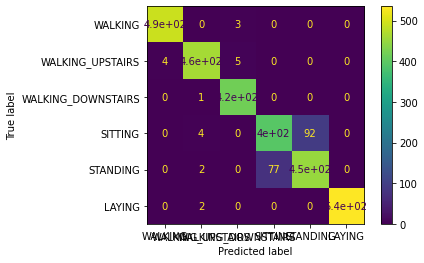

In [14]:
%time plot_confusion_matrix(rocket_pipeline, X_test, y_test, display_labels = LABELS)

## Conclusion

We were able to improve upon accuracy achieved by LSTM model by a very simple implementation using Rocket. LSTM had scored 91% and using Rocket + Ridge Regression classifier the accuracy jumped to 93%. The performance gain achieved becomes sweeter when you compare the time required to code and train, which was very small compared for rocket in comparison to LSTM in our case. 
The Rocket methodlogy is an innovative, simple and fresh technique that attracted my attention to this reserach paper. 